<a href="https://colab.research.google.com/github/AdemolaAri/machineLearning/blob/master/Logistic_Reg_WeeklyIslr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="5"> Logistic Regression: Python</font></h1>

<a id="logit"></a>
## Introduction


Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

### Weekly Stock direction with Logistic Regression
The Weekly Dataset available publicly through the ISLR library in R Studio contains 1,089 weekly stock returns for 21 years from the beginning of 1990 to the end of 2010.
The dataset has 8 variables: 

  **Year**, 5 **Lag variables**, **Today**(Price) and the binary variable **Direction** (Down/Up)

###  Download the Dataset

In [0]:
!wget -O WeeklyStock.txt https://raw.githubusercontent.com/AdemolaAri/machineLearning/datasets/WeeklyStock.txt

--2019-09-06 23:34:02--  https://raw.githubusercontent.com/AdemolaAri/machineLearning/datasets/WeeklyStock.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62683 (61K) [text/plain]
Saving to: ‘WeeklyStock.txt’

WeeklyStock.txt     100%[===================>]  61.21K  --.-KB/s    in 0.01s   

2019-09-06 23:34:02 (4.12 MB/s) - ‘WeeklyStock.txt’ saved [62683/62683]



### Load Data from local directory

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv("WeeklyStock.txt")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


<h2 id="preprocessing">Data pre-processing and selection</h2>

In [0]:
df.describe()
df['Year'].unique()
print(df.shape)
df['Direction'].value_counts()

(1089, 9)


Up      605
Down    484
Name: Direction, dtype: int64

Since this is a time series data (weekly) from 1990 to 2010, we'll train our model using past years and validate the model using the most recent years.

**Training Data**: 1990 - 2008

**Validation Data**: 2009 - 2010

Split the data accordingly

In [0]:
recentYear = df['Year'] >= 2009
val_df = df[recentYear]
train_df = df[~recentYear]
print('Training Data:', train_df.shape, '| Validation Data:', val_df.shape)

#train_df.describe()
#val_df.describe()

Training Data: (985, 9) | Validation Data: (104, 9)


Train / test split

In [0]:
X_train, y_train = (train_df.iloc[:, 1:-1], train_df['Direction'])
X_train[:5]
y_train[:5]

X_val, y_val = (val_df.iloc[:, 1:-1], val_df['Direction'])
#X_val.shape
y_val.shape

(104,)

<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
modelLogit = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
modelLogit

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
yhat = modelLogit.predict(X_val)
yhat[:10]

array(['Down', 'Down', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down',
       'Down', 'Up'], dtype=object)

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class **Down** i.e. P(Y=Down|X), and second column is probability of class **Up** i.e P(Y=Up|X):

In [0]:
prob = modelLogit.predict_proba(X_val)
np.around(prob[:10], decimals=3)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.94, 0.07],
       [0.7 , 0.3 ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ]])

<h2 id="evaluation">Evaluation</h2>

###1. jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_val, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9903846153846154

###2. confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools


def plot_cmx(cmx, classes, normalize=False, 
             title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cmx = cmx.astype('float') / cmx.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cmx)

    plt.imshow(cmx, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cmx.max() / 2.
    for i, j in itertools.product(range(cmx.shape[0]), range(cmx.shape[1])):
        plt.text(j, i, format(cmx[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cmx[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_val, yhat, labels=['Down', 'Up']))

[[42  1]
 [ 0 61]]


Confusion matrix, without normalization
[[42  1]
 [ 0 61]]


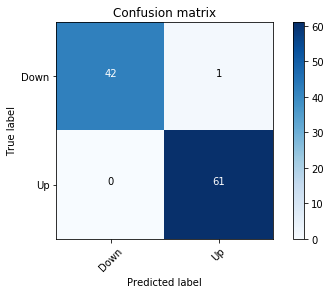

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, yhat, labels=['Down','Up'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_cmx(cnf_matrix, classes=['Down','Up'],normalize=False,  title='Confusion matrix')

###3. Precison, Recall and F1-Score
Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

In [0]:
print (classification_report(y_val, yhat))


              precision    recall  f1-score   support

        Down       1.00      0.98      0.99        43
          Up       0.98      1.00      0.99        61

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



###4. log loss
Now, lets try __log loss__ for evaluation. This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [0]:
from sklearn.metrics import log_loss
log_loss(y_val, prob)

0.18044781365124105

### Conclusion
We achieve an accuracy of close to 100% and the confusion matrix shows a misclassification of only 1 observation. Achieving a nearly perfect model is good but it might also be an indication of overfitting.
In this dataset, there is a **cheat variable** : this variable alone is can predict our target i.e. Direction. Exclude this variable and run the model again.


<h3>Thanks for reading!</h3>

<h4>Author:  <a href="https://www.linkedin.com/in/ademolabuwo">Ademola Arigbabuwo</a></h4>
